In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from skimage.color import rgb2gray
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt


In [6]:
from IPython.display import HTML
from base64 import b64encode
vid1 = open('../fr/dfdc-0/aaqaifqrwn.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(vid1).decode()
HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)
'''"""
vid3 = open('../fr/dfdc-0/aayrffkzxn.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(vid3).decode()
HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)
"""'''

'"""\nvid3 = open(\'../fr/dfdc-0/aayrffkzxn.mp4\',\'rb\').read()\ndata_url = "data:video/mp4;base64," + b64encode(vid3).decode()\nHTML("""\n<video width=600 controls>\n      <source src="%s" type="video/mp4">\n</video>\n""" % data_url)\n"""'

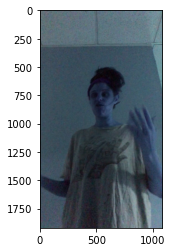

In [7]:
import cv2

VIDEO_STREAM = "../fr/dfdc-0/aayrffkzxn.mp4"
#VIDEO_STREAM_OUT = "/kaggle/input/deepfake-detection-challenge/test_videos/Result.mp4"

vidcap = cv2.VideoCapture(VIDEO_STREAM)
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        #cv2.imwrite("image"+str(count)+".jpg", image) # save frame as JPG file
        path = "../fr/dfdc-0/output"
        cv2.imwrite(os.path.join(path , "image"+str(count)+".jpg"), image)
        cv2.waitKey(0)
        plt.imshow(image)
           
    return hasFrames
sec = 0
frameRate = 0.5 #//it will capture image in each 0.5 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

(1080, 1920, 3)


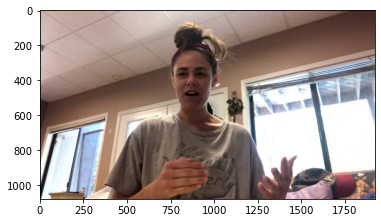

In [8]:
pic = plt.imread('image1.jpg')
print(pic.shape)
plt.imshow(pic)

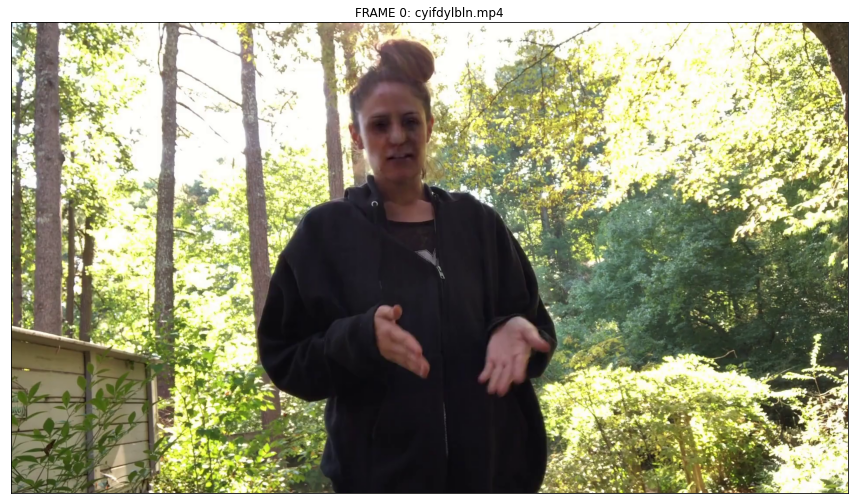

In [2]:
import cv2 as cv
import os
import matplotlib.pylab as plt
train_dir = '../fr/dfdc-0/'
fig, ax = plt.subplots(1,1, figsize=(15, 15))
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
# video_file = train_video_files[30]
video_file = '../fr/dfdc-0/cyifdylbln.mp4'
cap = cv.VideoCapture(video_file)
success, image = cap.read()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cap.release()   
ax.imshow(image)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.title.set_text(f"FRAME 0: {video_file.split('/')[-1]}")
plt.grid(False)

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 184, Left: 803, Bottom: 339, Right: 958
0


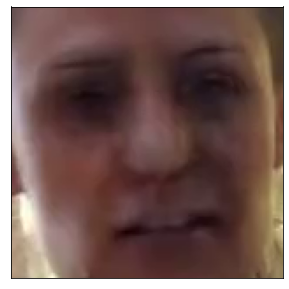

In [8]:
import face_recognition
face_locations = face_recognition.face_locations(image)

# https://github.com/ageitgey/face_recognition/blob/master/examples/find_faces_in_picture.py
from PIL import Image

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    plt.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(face_image)
    face_landmarks_list = face_recognition.face_landmarks(face_image)
    print(len(face_landmarks_list))
    #face_landmarks = face_landmarks_list[0]

In [2]:
import pandas as pd
train_sample_metadata = pd.read_json('../fr/dfdc-0/metadata.json').T
train_sample_metadata.head()

label  split        original
owxbbpjpch.mp4  FAKE  train  wynotylpnm.mp4
vpmyeepbep.mp4  REAL  train             NaN
fzvpbrzssi.mp4  REAL  train             NaN
htorvhbcae.mp4  FAKE  train  wclvkepakb.mp4
fckxaqjbxk.mp4  FAKE  train  vpmyeepbep.mp4

In [9]:
face_landmarks_list = face_recognition.face_landmarks(image)

The chin in this face has the following points: [(805, 244), (807, 264), (812, 284), (819, 303), (829, 322), (841, 339), (857, 353), (875, 363), (896, 364), (915, 358), (930, 343), (941, 326), (948, 306), (951, 286), (953, 268), (955, 249), (954, 230)]
The left_eyebrow in this face has the following points: [(816, 227), (825, 215), (839, 210), (855, 210), (870, 214)]
The right_eyebrow in this face has the following points: [(893, 212), (906, 206), (920, 203), (934, 205), (942, 215)]
The nose_bridge in this face has the following points: [(883, 229), (885, 243), (887, 256), (889, 271)]
The nose_tip in this face has the following points: [(872, 283), (881, 285), (890, 286), (898, 283), (905, 279)]
The left_eye in this face has the following points: [(832, 239), (841, 233), (852, 232), (862, 237), (852, 240), (842, 241)]
The right_eye in this face has the following points: [(903, 233), (912, 226), (922, 226), (930, 230), (923, 233), (913, 234)]
The top_lip in this face has the following p

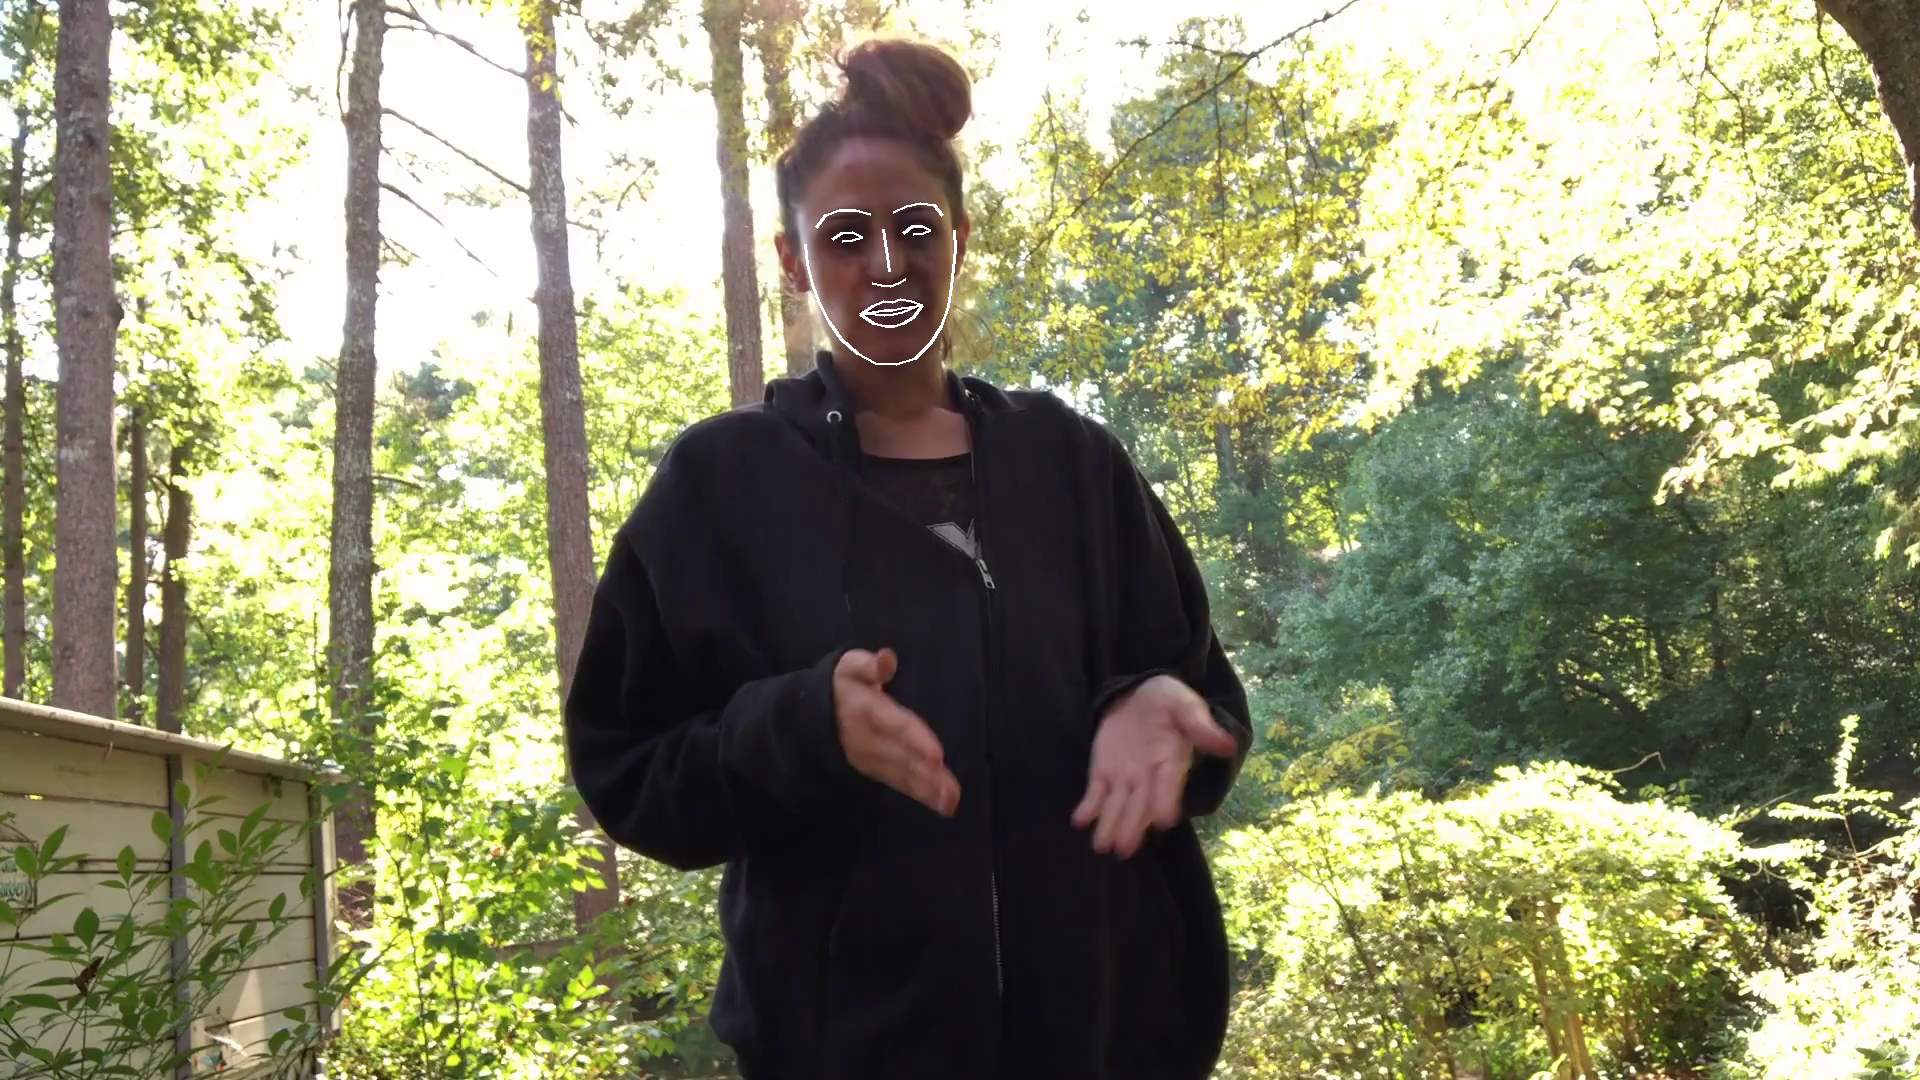

In [10]:
from PIL import Image, ImageDraw
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)
face_landmarks_list = face_recognition.face_landmarks(image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3)

# Show the picture
display(pil_image)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from skimage.color import rgb2gray
import cv2
import matplotlib.pyplot as plt
#%matplotlib inline
from scipy import ndimage
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

fig, axs = plt.subplots(19, 2, figsize=(15, 80))
axs = np.array(axs)
axs = axs.reshape(-1)
i = 0
for fn in train_sample_metadata.index[:23]:
    label = train_sample_metadata.loc[fn]['label']
    orig = train_sample_metadata.loc[fn]['label']
    video_file = f'../fr/dfdc-0/{fn}'
    ax = axs[i]
    cap = cv.VideoCapture(video_file)
    success, image = cap.read()
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) > 0:
        # Print first face
        face_location = face_locations[0]
        top, right, bottom, left = face_location
        face_image = image[top:bottom, left:right]
        ax.imshow(face_image)
        ax.grid(False)
        ax.title.set_text(f'{fn} - {label}')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        # Find landmarks
        '''
        face_landmarks_list = face_recognition.face_landmarks(face_image)
        face_landmarks = face_landmarks_list[0]
        pil_image = Image.fromarray(face_image)
        d = ImageDraw.Draw(pil_image)
        for facial_feature in face_landmarks.keys():
            d.line(face_landmarks[facial_feature], width=2)
        landmark_face_array = np.array(pil_image)
        ax2 = axs[i+1]
        ax2.imshow(landmark_face_array)
        ax2.grid(False)
        ax2.title.set_text(f'{fn} - {label}')
        ax2.xaxis.set_visible(False)
        ax2.yaxis.set_visible(False)
        '''
        i += 2
plt.grid(False)
plt.show()

In [11]:
video_file = '../fr/dfdc-0/cyifdylbln.mp4'

cap = cv2.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

The number of frames saved:  300


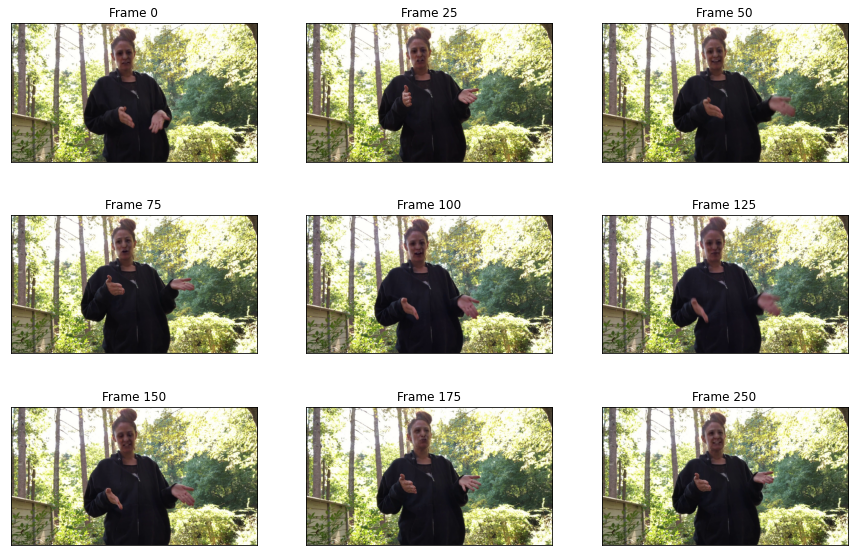

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = np.array(axes)
axes = axes.reshape(-1)

ax_ix = 0
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

IndexError: index 9 is out of bounds for axis 0 with size 9

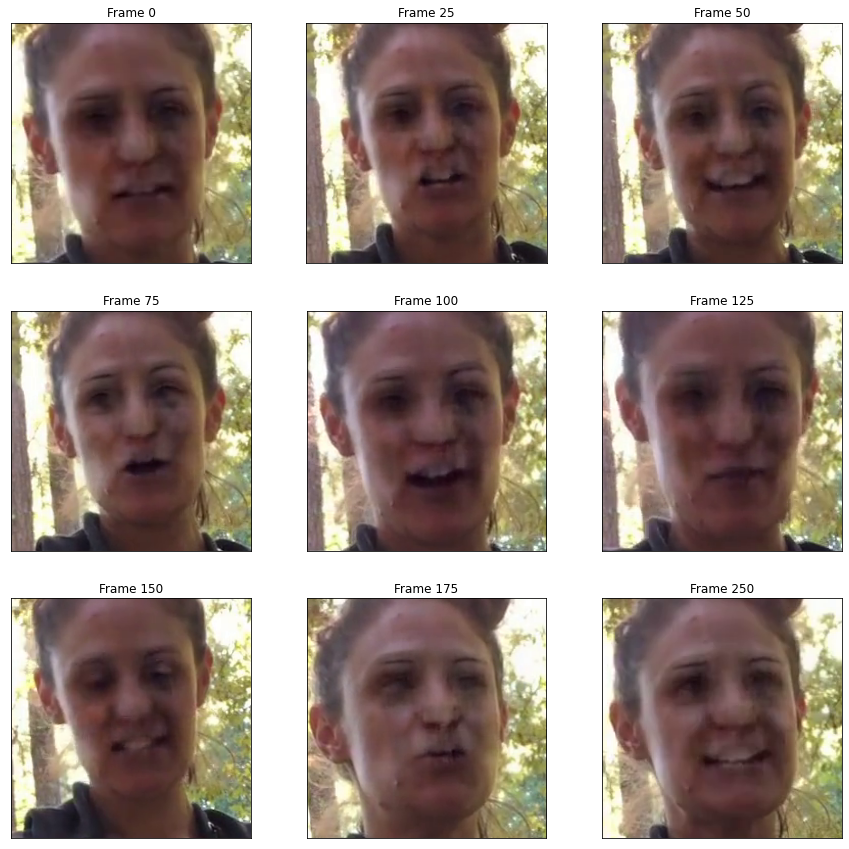

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Could not find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    image = cv.cvtColor(frame_face, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

Could not identify face landmarks for frame 0


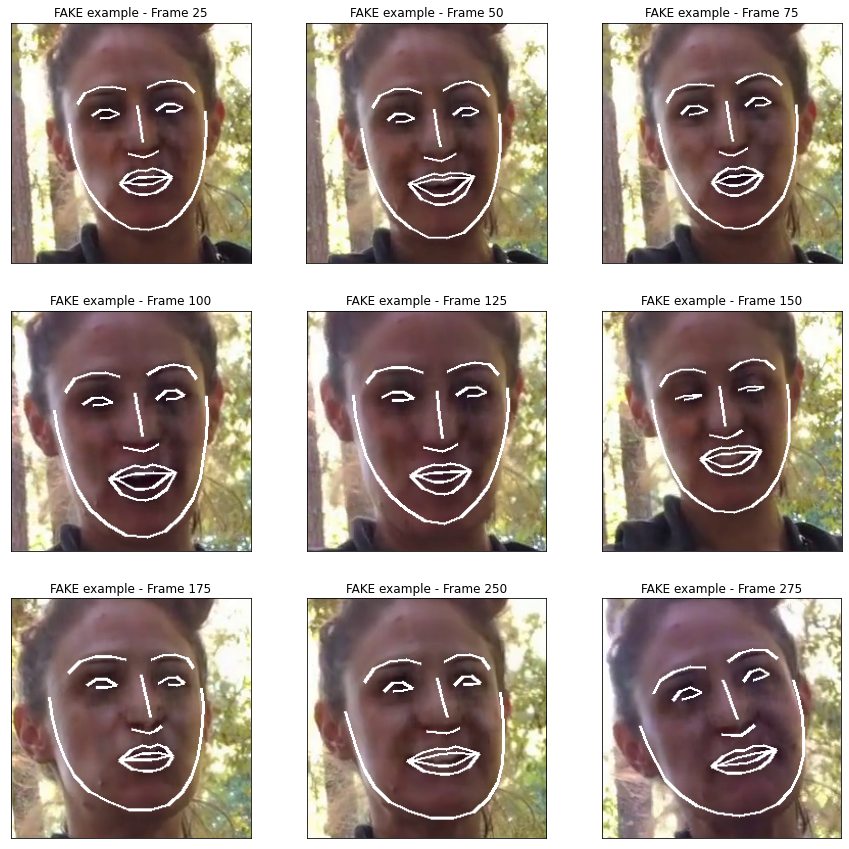

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Count find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    face_landmarks_list = face_recognition.face_landmarks(frame_face)
    if len(face_landmarks_list) == 0:
        print(f'Could not identify face landmarks for frame {i}')
        continue
    face_landmarks = face_landmarks_list[0]
    pil_image = Image.fromarray(frame_face)
    d = ImageDraw.Draw(pil_image)
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3, fill='white')
    landmark_face_array = np.array(pil_image)
    image = cv.cvtColor(landmark_face_array, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].grid(False)
    axes[ax_ix].set_title(f'FAKE example - Frame {i}')
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    ax_ix += 1
plt.grid(False)
plt.show()

In [ ]:
fn = 'cyifdylbln.mp4'
video_file = f'/kaggle/input/deepfake-detection-challenge/train_sample_videos/{fn}'

cap = cv2.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Count find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    face_landmarks_list = face_recognition.face_landmarks(frame_face)
    if len(face_landmarks_list) == 0:
        print(f'Could not identify face landmarks for frame {i}')
        continue
    face_landmarks = face_landmarks_list[0]
    pil_image = Image.fromarray(frame_face)
    d = ImageDraw.Draw(pil_image)
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=2, fill='white')
    landmark_face_array = np.array(pil_image)
    image = cv.cvtColor(landmark_face_array, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].grid(False)
    axes[ax_ix].set_title(f'REAL example - Frame {i}')
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    ax_ix += 1
    if ax_ix >= len(axes):
        break
plt.grid(False)
plt.show()